[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/7_Mlp_mnist.ipynb)

>>>[本地环境搭建](#scrollTo=ygmJCXCNvMd_)

>>>[启动tensorflow的Anaconda虚拟环境](#scrollTo=ygmJCXCNvMd_)

>>>[进入tensorflow的Anaconda虚拟环境](#scrollTo=ygmJCXCNvMd_)

>>>[安装tensorFlow](#scrollTo=ygmJCXCNvMd_)

>>>[安装keras](#scrollTo=ygmJCXCNvMd_)

>>>[启动jupyter notebook](#scrollTo=ygmJCXCNvMd_)

>[1.数据预处理](#scrollTo=-BL3o2r19XVi)

>>[MNIST数据下载](#scrollTo=yp3c_2KK0JF3)

>>>[查看数据](#scrollTo=rFpn41Md0ieS)

>>[多层感知器模型数据预处理](#scrollTo=8sJHaRZg-2q4)

>>>[features 数据预处理](#scrollTo=WbGUZEq4_EyZ)

>>>[label 数据预处理](#scrollTo=F-DoWFv1Byfw)

>[2.建立模型](#scrollTo=fySSQEbEGZF1)

>[进行训练](#scrollTo=3urUPZiiG2ke)

>[4.以测试数据评估模型准确率](#scrollTo=yueitWfWQwjb)

>[5.进行预测](#scrollTo=jIAemdRQqCIZ)

>[6.显示混淆矩阵](#scrollTo=bj6jJX86p2RA)

>>[7.隐藏层增加为1000个神经元](#scrollTo=38PEoH2t2OLU)

>>[8.多层感知器加入DropOut功能，以避免过度拟合](#scrollTo=SFiGWxxZ5r7v)

>>[](#scrollTo=Pk38Wjbd2GJm)



**安装完成anaconda后，**

### 本地环境搭建

$>md workspace

$>cd workspace

$>conda create --name tensorFlow python=3.6 anaconda

### 启动tensorflow的Anaconda虚拟环境
$>source activate tensorFlow

### 进入tensorflow的Anaconda虚拟环境
(tensorFlow)$pip install --upgrade pip

### 安装tensorFlow
$pip install tensorFlow

### 安装keras
$pip install keras

### 启动jupyter notebook
$jupyter notebook



# 1.数据预处理




In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [0]:
from keras.datasets import mnist

## MNIST数据下载


In [0]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [78]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [79]:
#@title x_train_image 为三维矩阵 6000 x 28 x 28
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


### 查看数据

In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) #设置显示大小
    plt.imshow(image, cmap='binary')
    plt.show()

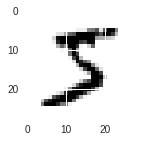

In [81]:
plot_image(x_train_image[0])

In [82]:
y_train_label[0]

5

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14) #设置显示大小
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) # 建立subgraph子图形为5行5列
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([])  #不显示x，y刻度
        ax.set_yticks([])        
        idx+=1 
    plt.show()

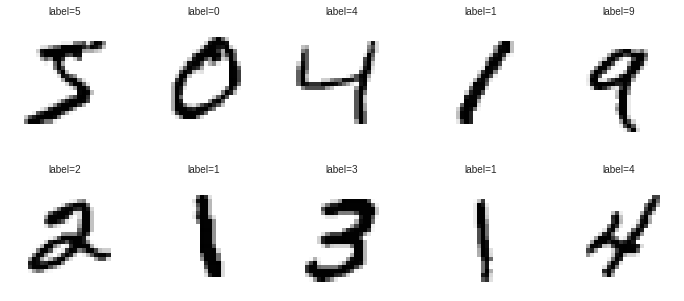

In [84]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [85]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


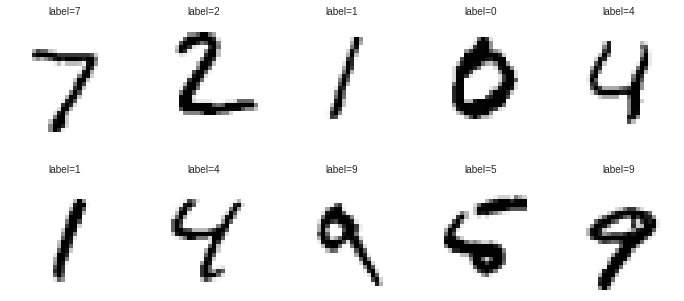

In [86]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

## 多层感知器模型数据预处理

In [87]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


### features 数据预处理

In [0]:
#@title 转化为一维

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [89]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [90]:
x_train_image[0]  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
#@title 数字标准化

x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [92]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [93]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### label 数据预处理

In [0]:
#@title one-hot encoding(一位有效编码) 转换为10个0或1的组合
y_TrainOne_Hot = np_utils.to_categorical(y_train_label)
y_TestOne_Hot = np_utils.to_categorical(y_test_label)

In [95]:
y_TrainOne_Hot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 2.建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [100]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 3. 进行训练

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [102]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_TrainOne_Hot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9400
Epoch 2/10
 - 2s - loss: 0.1916 - acc: 0.9450 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/10
 - 2s - loss: 0.1358 - acc: 0.9615 - val_loss: 0.1262 - val_acc: 0.9645
Epoch 4/10
 - 2s - loss: 0.1031 - acc: 0.9702 - val_loss: 0.1125 - val_acc: 0.9674
Epoch 5/10
 - 2s - loss: 0.0813 - acc: 0.9774 - val_loss: 0.0986 - val_acc: 0.9714
Epoch 6/10
 - 2s - loss: 0.0660 - acc: 0.9815 - val_loss: 0.0937 - val_acc: 0.9720
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9849 - val_loss: 0.0910 - val_acc: 0.9733
Epoch 8/10
 - 2s - loss: 0.0457 - acc: 0.9877 - val_loss: 0.0831 - val_acc: 0.9761
Epoch 9/10
 - 2s - loss: 0.0380 - acc: 0.9903 - val_loss: 0.0824 - val_acc: 0.9759
Epoch 10/10
 - 2s - loss: 0.0315 - acc: 0.9919 - val_loss: 0.0808 - val_acc: 0.9763


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

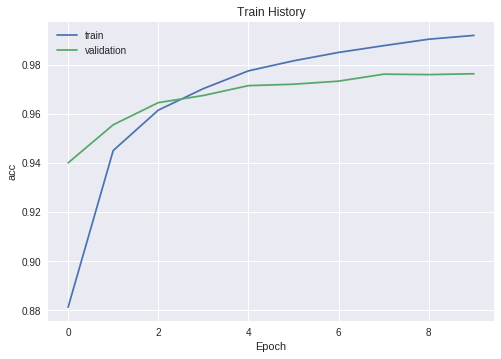

In [104]:
show_train_history(train_history,'acc','val_acc')

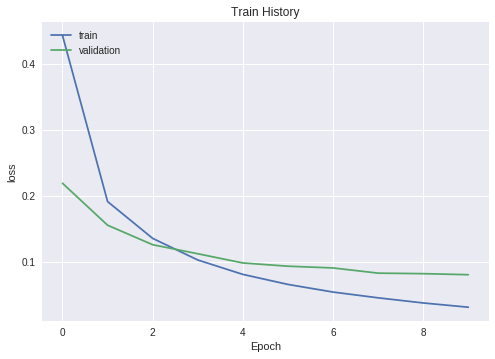

In [105]:
show_train_history(train_history,'loss','val_loss')

#  4.以测试数据评估模型准确率

In [106]:
scores = model.evaluate(x_Test_normalize, y_TestOne_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 129us/step

accuracy= 0.9768


# 5.进行预测

In [0]:
prediction=model.predict_classes(x_Test)

In [108]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

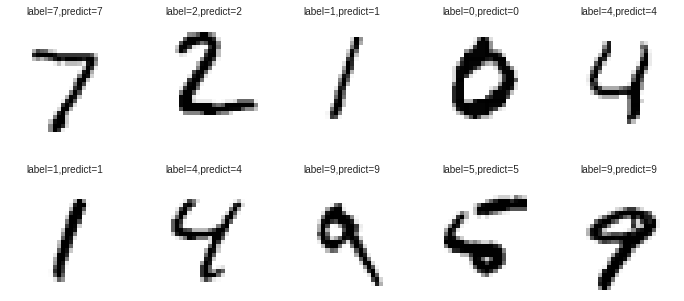

In [109]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# 6.显示混淆矩阵

In [110]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,4,0,1012,1,1,0,2,4,7,1
3,0,0,4,991,0,2,0,3,5,5
4,1,0,5,1,960,0,3,0,3,9
5,3,0,0,17,1,853,7,1,7,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,12,7,1,0,0,989,6,8
8,3,0,3,5,1,1,1,2,957,1


In [111]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [112]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


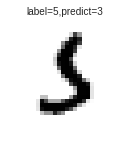

In [113]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

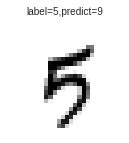

In [114]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 7.隐藏层增加为1000个神经元

In [0]:
model = Sequential()
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))


In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [117]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [118]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_TrainOne_Hot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2951 - acc: 0.9152 - val_loss: 0.1536 - val_acc: 0.9561
Epoch 2/10
 - 3s - loss: 0.1154 - acc: 0.9670 - val_loss: 0.1212 - val_acc: 0.9637
Epoch 3/10
 - 3s - loss: 0.0739 - acc: 0.9792 - val_loss: 0.0927 - val_acc: 0.9734
Epoch 4/10
 - 3s - loss: 0.0523 - acc: 0.9856 - val_loss: 0.0817 - val_acc: 0.9746
Epoch 5/10
 - 2s - loss: 0.0362 - acc: 0.9903 - val_loss: 0.0829 - val_acc: 0.9748
Epoch 6/10
 - 3s - loss: 0.0248 - acc: 0.9939 - val_loss: 0.0748 - val_acc: 0.9783
Epoch 7/10
 - 3s - loss: 0.0185 - acc: 0.9957 - val_loss: 0.0728 - val_acc: 0.9778
Epoch 8/10
 - 2s - loss: 0.0136 - acc: 0.9968 - val_loss: 0.0727 - val_acc: 0.9797
Epoch 9/10
 - 2s - loss: 0.0100 - acc: 0.9982 - val_loss: 0.0721 - val_acc: 0.9796
Epoch 10/10
 - 3s - loss: 0.0070 - acc: 0.9990 - val_loss: 0.0788 - val_acc: 0.9773


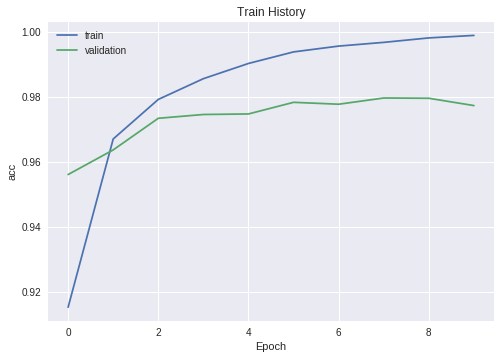

In [119]:
show_train_history(train_history,'acc','val_acc')

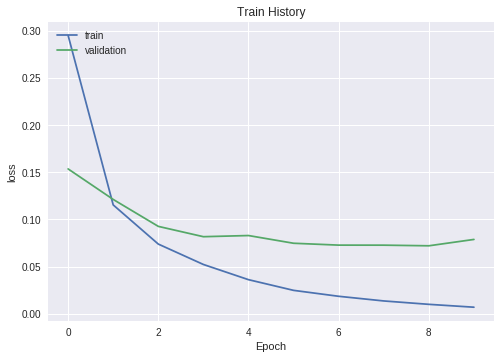

In [120]:
show_train_history(train_history,'loss','val_loss')

**隐藏层增加为1000个神经元后，以上数据图比较发现：**

1.   无论是训练还是验证，准确率都越来越高；
2.   在Epoch训练后期，“acc训练都准确率”都比“val_acc验证的准确率“高，过度拟合更严重。



In [121]:
scores = model.evaluate(x_Test_normalize, y_TestOne_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 120us/step

accuracy= 0.9798


# 8.多层感知器加入DropOut功能，以避免过度拟合

##  

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

In [123]:
#将“输入层”与“隐藏层”加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.5))


#将“输出层”加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,
                        y=y_TrainOne_Hot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3573 - acc: 0.8928 - val_loss: 0.1623 - val_acc: 0.9543
Epoch 2/10
 - 2s - loss: 0.1598 - acc: 0.9531 - val_loss: 0.1186 - val_acc: 0.9654
Epoch 3/10
 - 2s - loss: 0.1154 - acc: 0.9661 - val_loss: 0.0967 - val_acc: 0.9703
Epoch 4/10
 - 2s - loss: 0.0913 - acc: 0.9726 - val_loss: 0.0872 - val_acc: 0.9722
Epoch 5/10
 - 2s - loss: 0.0748 - acc: 0.9773 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 6/10
 - 2s - loss: 0.0643 - acc: 0.9798 - val_loss: 0.0761 - val_acc: 0.9772
Epoch 7/10
 - 2s - loss: 0.0552 - acc: 0.9831 - val_loss: 0.0769 - val_acc: 0.9776
Epoch 8/10
 - 2s - loss: 0.0465 - acc: 0.9855 - val_loss: 0.0712 - val_acc: 0.9793
Epoch 9/10
 - 2s - loss: 0.0415 - acc: 0.9875 - val_loss: 0.0701 - val_acc: 0.9792
Epoch 10/10
 - 2s - loss: 0.0374 - acc: 0.9881 - val_loss: 0.0679 - val_acc: 0.9803


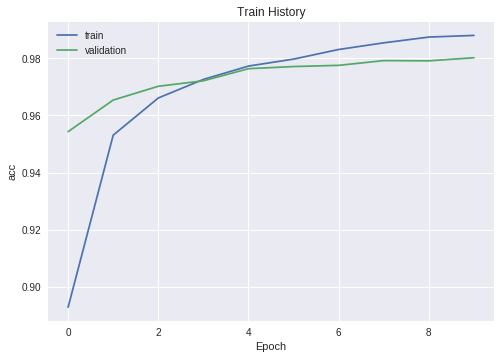

In [127]:
show_train_history(train_history,'acc','val_acc')

In [129]:
scores = model.evaluate(x_Test_normalize, y_TestOne_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 65us/step

accuracy= 0.9821


**多层感知器加入DropOut功能，以上数据图比较发现：**

1.   无论是训练还是验证，准确率都越来越高；
2.   在Epoch训练后期，虽然“acc训练都准确率”都比“val_acc验证的准确率“高，但是两者差距变小，过度拟合程度已经减少；
3.从执行结果准确率0.98,比之前没有加入dropout还高，这个代表加入dropout后不但解决过度拟合问题，还增加了准确率。

# 9.建立多层感知器模型包含两个隐藏层


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

In [131]:
#将“输入层”与“隐藏层1”加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.5))

#将“隐藏层2”加入模型
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.5))
#将“输出层”加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_TrainOne_Hot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3771 - acc: 0.8823 - val_loss: 0.1352 - val_acc: 0.9603
Epoch 2/10
 - 3s - loss: 0.1595 - acc: 0.9502 - val_loss: 0.0976 - val_acc: 0.9703
Epoch 3/10
 - 3s - loss: 0.1201 - acc: 0.9631 - val_loss: 0.0913 - val_acc: 0.9721
Epoch 4/10
 - 3s - loss: 0.0974 - acc: 0.9693 - val_loss: 0.0795 - val_acc: 0.9751
Epoch 5/10
 - 3s - loss: 0.0826 - acc: 0.9735 - val_loss: 0.0746 - val_acc: 0.9772
Epoch 6/10
 - 3s - loss: 0.0740 - acc: 0.9758 - val_loss: 0.0745 - val_acc: 0.9768
Epoch 7/10
 - 3s - loss: 0.0655 - acc: 0.9786 - val_loss: 0.0753 - val_acc: 0.9798
Epoch 8/10
 - 3s - loss: 0.0612 - acc: 0.9804 - val_loss: 0.0753 - val_acc: 0.9788
Epoch 9/10
 - 3s - loss: 0.0576 - acc: 0.9813 - val_loss: 0.0775 - val_acc: 0.9792
Epoch 10/10
 - 3s - loss: 0.0522 - acc: 0.9831 - val_loss: 0.0758 - val_acc: 0.9789


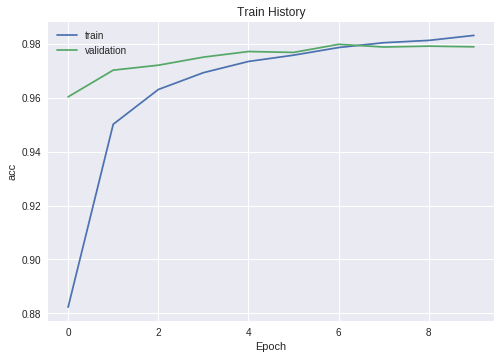

In [134]:
show_train_history(train_history,'acc','val_acc')

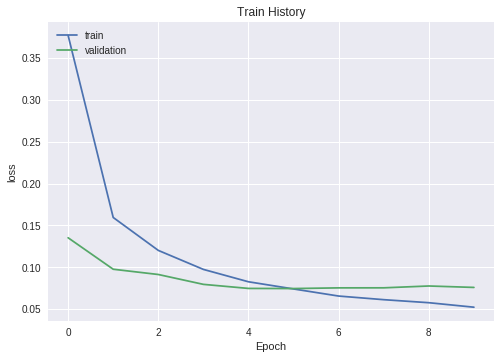

In [135]:
show_train_history(train_history,'loss','val_loss')

In [136]:
scores = model.evaluate(x_Test_normalize, y_TestOne_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 76us/step

accuracy= 0.9805


**多层感知器加入两层隐藏层后，以上数据图比较发现：**

1.   无论是训练还是验证，准确率都越来越高；
2.   在Epoch训练后期，虽然“acc训练都准确率”都比“val_acc验证的准确率“高，但是两者差距变小，过度拟合程度已经减少；
3.从执行结果准确率0.98,比之前没有加入两层隐藏层准确率没有明显提升；